<a href="https://colab.research.google.com/github/fragenabhishek/ImageClassification/blob/main/SoundClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
conda install -c conda-forge librosa

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - librosa


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    audioread-2.1.8            |   py37hc8dfbb8_2          32 KB  conda-forge
    libflac-1.3.3              |       he1b5a44_0         517 KB  conda-forge
    libogg-1.3.2               |    h516909a_1002         206 KB  conda-forge
    librosa-0.7.2              |             py_1         1.5 MB  conda-forge
    libsndfile-1.0.28          |    he1b5a44_1000         529 KB  conda-forge
    libvorbis-1.3.6            |       he1b5a44_2         284 KB  conda-forge
    pysoundfile-0.10.2         |          py_1001          21 KB  conda-forge
    resampy-0.2.2              |             py_0         332 KB  conda-forge
    ------------------------------------------------------------
                                           

In [ ]:


# Basic Libraries

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler



In [ ]:


# Libraries for Classification and building Models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [ ]:
# Project Specific Libraries

import os
import librosa
import librosa.display

import glob 
import skimage

In [ ]:
df = pd.read_csv("../input/urbansound8k/UrbanSound8K.csv")

'''We will extract classes from this metadata.'''

df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
dat1, sampling_rate1 = librosa.load('../input/urbansound8k/fold5/100032-3-0-0.wav')
dat2, sampling_rate2 = librosa.load('../input/urbansound8k/fold5/100263-2-0-117.wav')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

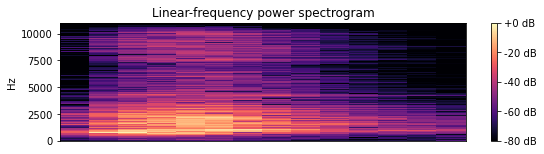

In [ ]:


plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')



Text(0.5, 1.0, 'Linear-frequency power spectrogram')

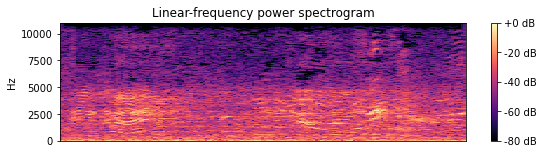

In [ ]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

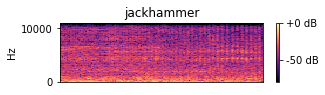

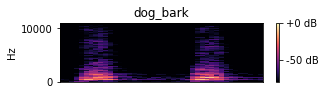

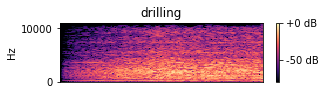

In [ ]:
'''Using random samples to observe difference in waveforms.'''

arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

for i in range(192, 197, 2):
    path = '../input/urbansound8k/fold' + str(fold[i]) + '/' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

In [ ]:
'''EXAMPLE'''

dat1, sampling_rate1 = librosa.load('../input/urbansound8k/fold5/100032-3-0-0.wav')
arr = librosa.feature.melspectrogram(y=dat1, sr=sampling_rate1)
arr.shape

(128, 14)

In [ ]:
feature = []
label = []

def parser(row):
    # Function to load files and extract features
    for i in range(8732):
        file_name = '../input/urbansound8k/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # We extract mfcc feature from data
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)        
        feature.append(mels)
        label.append(df["classID"][i])
    return [feature, label]

In [ ]:
temp = parser(df)

In [ ]:


temp = np.array(temp)
data = temp.transpose()



In [ ]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([8732, 128])

(8732,) (8732,)


In [ ]:
for i in range(8732):
    X[i] = (X_[i])

In [ ]:
Y = to_categorical(Y)


In [ ]:
'''Final Data'''
print(X.shape)
print(Y.shape)

(8732, 128)
(8732, 10)


In [ ]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)



In [ ]:
X_train = X_train.reshape(6549, 16, 8, 1)
X_test = X_test.reshape(2183, 16, 8, 1)

In [ ]:
input_dim = (16, 8, 1)

In [ ]:
model = Sequential()


In [ ]:
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:


model.fit(X_train, Y_train, epochs = 100, batch_size = 50, validation_data = (X_test, Y_test))



Train on 6549 samples, validate on 2183 samples
Epoch 1/100
6549/6549 [==============================] - 1s 90us/sample - loss: 0.4811 - accuracy: 0.8441 - val_loss: 0.8360 - val_accuracy: 0.7687
Epoch 2/100
6549/6549 [==============================] - 1s 92us/sample - loss: 0.4454 - accuracy: 0.8507 - val_loss: 0.8166 - val_accuracy: 0.7696
Epoch 3/100
6549/6549 [==============================] - 1s 86us/sample - loss: 0.4227 - accuracy: 0.8627 - val_loss: 0.8203 - val_accuracy: 0.7907
Epoch 4/100
6549/6549 [==============================] - 1s 92us/sample - loss: 0.4262 - accuracy: 0.8626 - val_loss: 0.8943 - val_accuracy: 0.7595
Epoch 5/100
6549/6549 [==============================] - 1s 89us/sample - loss: 0.4097 - accuracy: 0.8647 - val_loss: 0.7738 - val_accuracy: 0.7907
Epoch 6/100
6549/6549 [==============================] - 1s 85us/sample - loss: 0.3602 - accuracy: 0.8777 - val_loss: 0.7780 - val_accuracy: 0.7888
Epoch 7/100
6549/6549 [==============================] - 1s 105u

6549/6549 [==============================] - 1s 87us/sample - loss: 0.0750 - accuracy: 0.9739 - val_loss: 0.7932 - val_accuracy: 0.8603
Epoch 56/100
6549/6549 [==============================] - 1s 90us/sample - loss: 0.0727 - accuracy: 0.9763 - val_loss: 0.7883 - val_accuracy: 0.8566
Epoch 57/100
6549/6549 [==============================] - 1s 87us/sample - loss: 0.0704 - accuracy: 0.9751 - val_loss: 0.7680 - val_accuracy: 0.8543
Epoch 58/100
6549/6549 [==============================] - 1s 84us/sample - loss: 0.0728 - accuracy: 0.9745 - val_loss: 0.7726 - val_accuracy: 0.8575
Epoch 59/100
6549/6549 [==============================] - 1s 90us/sample - loss: 0.0940 - accuracy: 0.9681 - val_loss: 0.8281 - val_accuracy: 0.8484
Epoch 60/100
6549/6549 [==============================] - 1s 90us/sample - loss: 0.1035 - accuracy: 0.9675 - val_loss: 0.8714 - val_accuracy: 0.8520
Epoch 61/100
6549/6549 [==============================] - 1s 114us/sample - loss: 0.0798 - accuracy: 0.9747 - val_loss:

In [ ]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

2183/2183 [==============================] - 0s 79us/sample - loss: 0.8860 - accuracy: 0.8690
[0.8859728558097364, 0.8689876]


In [ ]:
preds = np.argmax(predictions, axis = 1)

In [ ]:
result = pd.DataFrame(preds)
result.to_csv("UrbanSound8kResults.csv")

In [ ]:
model.save("model.h5")